In [1]:
# Binary Classification with Sonar Dataset: Baseline
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing

In [2]:
# load dataset
dataframe = read_csv("KidneyStoneDataset.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:5120]
Y = dataset[:,5120]
normalized_X = preprocessing.normalize(X)

In [7]:
from keras.utils import np_utils
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# One-hot encode labels
Y_cat = np_utils.to_categorical(encoded_Y)

x_train shape (165, 5120)
x_val shape (22, 5120)
x_test shape (34, 5120)


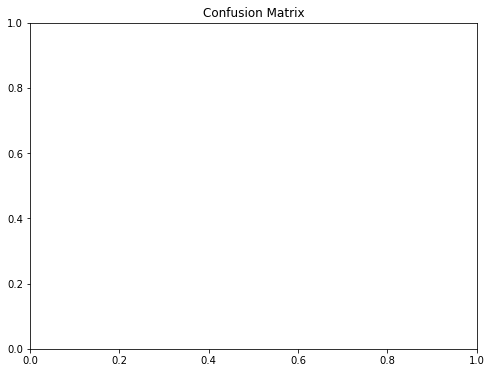

In [32]:
from sklearn.model_selection  import train_test_split
from visual_callbacks import ConfusionMatrixPlotter
# Use sklearn to split into random Train and Test sets
#X_train, X_test, y_train, y_test = train_test_split(normalized_X, Y_cat, test_size=0.3, random_state=100,shuffle=True)


train_ratio = 0.75
validation_ratio = 0.10
test_ratio = 0.15

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, x_test, y_train, y_test = train_test_split(normalized_X, Y_cat, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 



print("x_train shape",X_train.shape)
print("x_val shape",x_val.shape)
print("x_test shape",x_test.shape)

class_names = ['Healthy', 'Patient']
plotter = ConfusionMatrixPlotter(X_val=x_val, classes=class_names, Y_val=y_val)

Epoch 1/100
21/21 [==============================] - 0s 11ms/step - loss: 0.5918 - acc: 0.8121 - val_loss: 0.3655 - val_acc: 0.9091
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4967 - acc: 0.8182 - val_loss: 0.3186 - val_acc: 0.9091
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4792 - acc: 0.8182 - val_loss: 0.3522 - val_acc: 0.9091
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4904 - acc: 0.8182 - val_loss: 0.3636 - val_acc: 0.9091
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4878 - acc: 0.8182 - val_loss: 0.3449 - val_acc: 0.9091
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4747 - acc: 0.8182 - val_loss: 0.3536 - val_acc: 0.9091
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4814 - acc: 0.8182 - val_loss: 0.3152 - val_acc: 0.9091
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4935 - 

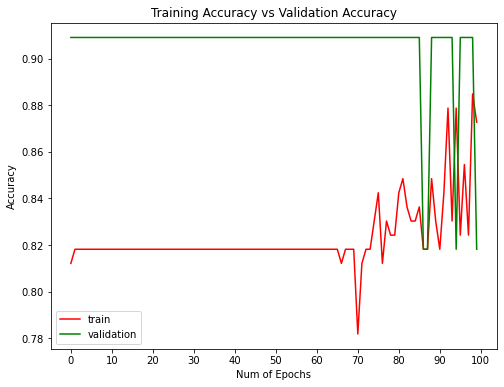

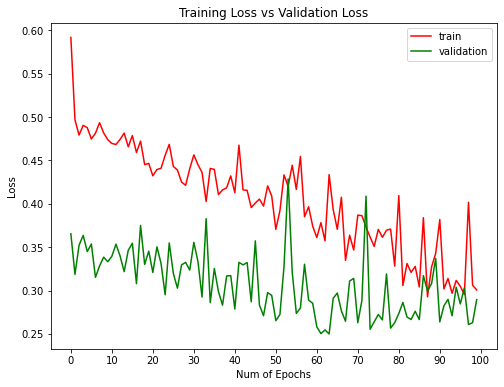

In [33]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.models import Model
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Dense
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from visual_callbacks import AccLossPlotter
from sklearn.model_selection  import train_test_split
from visual_callbacks import ConfusionMatrixPlotter
model=Sequential()

model.add(Dense(32,input_dim=5120))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))

#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
cnn=model.fit(X_train,y_train,validation_data=(x_val,y_val),epochs=100, batch_size=8)#, callbacks=[plotter])

plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 10))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 10))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [34]:
def plot_confusion_matrix(cm, names,normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 32)                163872    
_________________________________________________________________
dropout_24 (Dropout)         (None, 32)                0         
_________________________________________________________________
activation_24 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_25 (Dropout)         (None, 32)                0         
_________________________________________________________________
activation_25 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)               

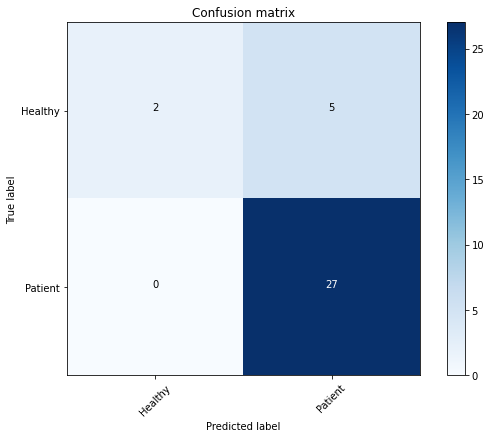

In [35]:
model.summary()
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test2 = np.argmax(y_test,axis=1)

   
# Compute confusion matrix
cm = confusion_matrix(y_test2, pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, class_names)

In [36]:
from sklearn.metrics import accuracy_score

train_preds = np.where(model.predict(X_train) > 0.5, 1, 0)
test_preds = np.where(model.predict(x_test) > 0.5, 1, 0)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f'Train Accuracy : {train_accuracy:.4f}')
print(f'Test Accuracy  : {test_accuracy:.4f}')

Train Accuracy : 0.8909
Test Accuracy  : 0.8529
